- Figure 4a : marker gene 확인
- Extended Figure 13a
- Extended Figure 13b
- Extended Figure 13c
- Extended Figure 14c

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

import scanpy as sc
import pandas as pd
import numpy as np

import mplscience
import seaborn as sns
import matplotlib.pyplot as plt
import glasbey

In [7]:
# Set Path and Color Palette
data_path = '../output'
plot_path = '../plot'
np.random.seed(777)

con_color = 'viridis'
cat_color = glasbey.extend_palette(sns.color_palette('Set2'), 13)
sample_color = glasbey.extend_palette(sns.color_palette('pastel'), 12)

In [3]:
adata = sc.read_h5ad(os.path.join(data_path, 'reannotated.h5ad'))
adata

AnnData object with n_obs × n_vars = 53408 × 29009
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP', 'leiden_res1', 'wb_anno', 'wb_conf_score', 'cellid_prediction', 'leiden_res2', 'new_cell_type', 'old_cell_type', 'leiden', 'predicted_labels', 'conf_score', 'each_cell_type'
    uns: 'cell_type_colors', 'leiden', 'neighbors', 'sample_info_colors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [5]:
adata.uns['cell_type_colors'] = cat_color

# Extended Figure 13a

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


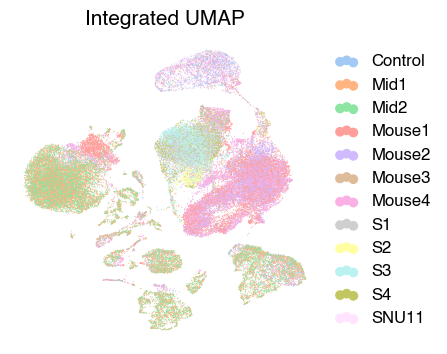

In [8]:
batch_key = 'sample_info'
ri = np.random.permutation(list(range(adata.shape[0])))
with mplscience.style_context():
    sc.pl.umap(adata[ri,:], color = [batch_key], title = "Integrated UMAP", show=False, frameon=False, palette=sample_color)
    plt.savefig(os.path.join(plot_path, 'Extended_Figure_13a.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
    plt.show()

# Figure 4a

In [12]:
ordered_cell = ['Tumor', 'OPC', 'COP', 'Oligodendrocytes', 'Astrocytes',  'Neural stem cells', 'Neurons',  'Microglia', 'T-cells', 'Ependymal cell', 'Endothelial', 'Pericytes',]
adata.obs['cell_type'] = pd.Categorical(values = adata.obs['cell_type'], categories = ordered_cell, ordered = True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


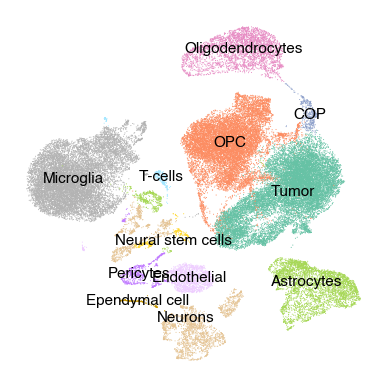

In [13]:
with mplscience.style_context():
    ax = sc.pl.umap(adata, color = 'cell_type', legend_loc='on data', title = '', show=False, frameon=False)
    fig = ax.get_figure()
    fig.tight_layout()
    plt.savefig(os.path.join(plot_path, 'Fig4a.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
    plt.show()

# Extended Figure 13b

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


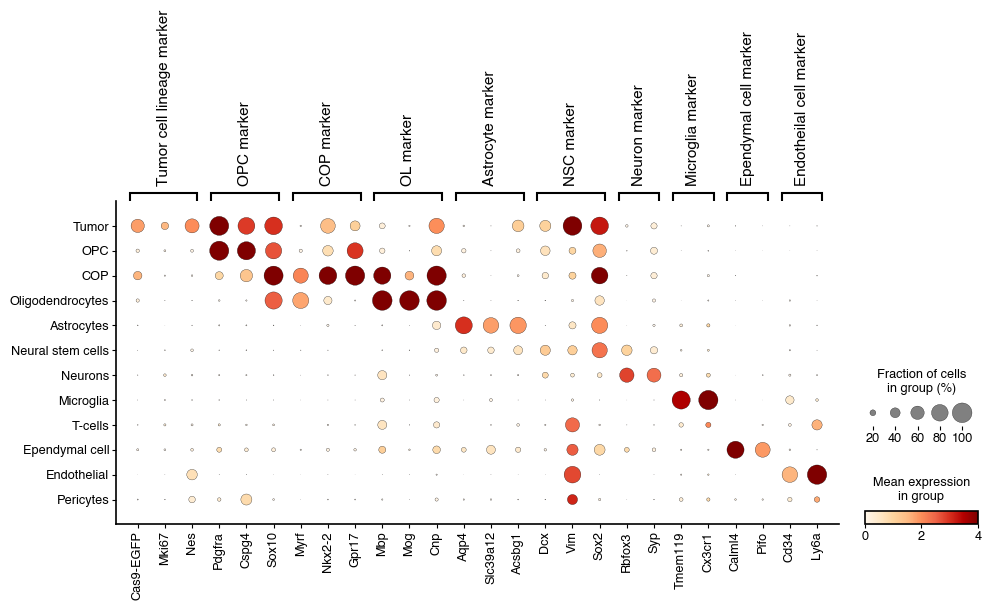

In [16]:
#Finding the marker gene set
marker_genes = {
    "Tumor cell lineage marker" : ["Cas9-EGFP", "Mki67", "Nes"],
    "OPC marker" : ["Pdgfra", "Cspg4", "Sox10"],
    "COP marker" : ["Myrf", "Nkx2-2", "Gpr17"],
    "OL marker" : ["Mbp", "Mog", "Cnp"],
    "Astrocyte marker" : ["Aqp4", "Slc39a12", "Acsbg1"],
    "NSC marker" : ["Dcx", "Vim", "Sox2"],
    "Neuron marker" : ["Rbfox3", "Syp", ],
    "Microglia marker" : ["Tmem119", "Cx3cr1", ], 
    # "Macrophage marker" : ["Cd68", "Csf1r", "C1qa"],
    "Ependymal cell marker" : ["Calml4",  "Pifo"], 
    "Endotheilal cell marker" : ["Cd34",  "Ly6a"], 
}
with mplscience.style_context():
    dp_cellmarker = sc.pl.dotplot(adata, marker_genes, groupby="cell_type",  show=False, vmin=0, vmax = 4, cmap='OrRd')
    ax = dp_cellmarker["mainplot_ax"]
    for l in ax.get_xticklabels():
        l.set_style("italic")
    fig = ax.get_figure()
    fig.tight_layout()
    plt.savefig(os.path.join(plot_path, 'Extended_Figure_13b_dotplot.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
    plt.show()

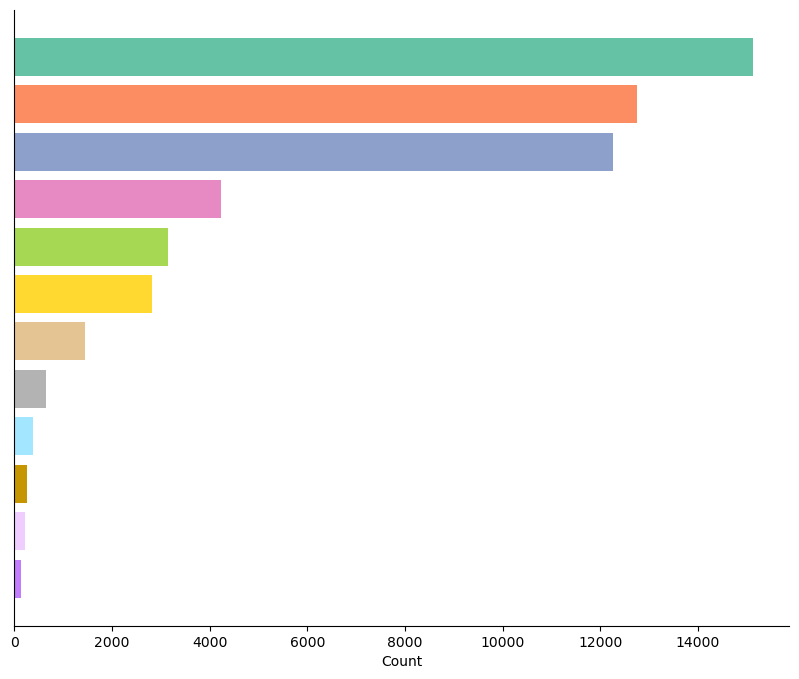

In [17]:
cell_type_counts = adata.obs.cell_type.value_counts()
cell_types = cell_type_counts.index

plt.figure(figsize=(10, 8))
bars = plt.barh(cell_type_counts.index, cell_type_counts.values, color=cat_color)

plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])

plt.title('')
plt.xlabel('Count')
plt.ylabel('')

plt.gca().invert_yaxis()
plt.savefig(os.path.join(plot_path, 'Extended_Figure_13b_celltype_counts.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
plt.show()

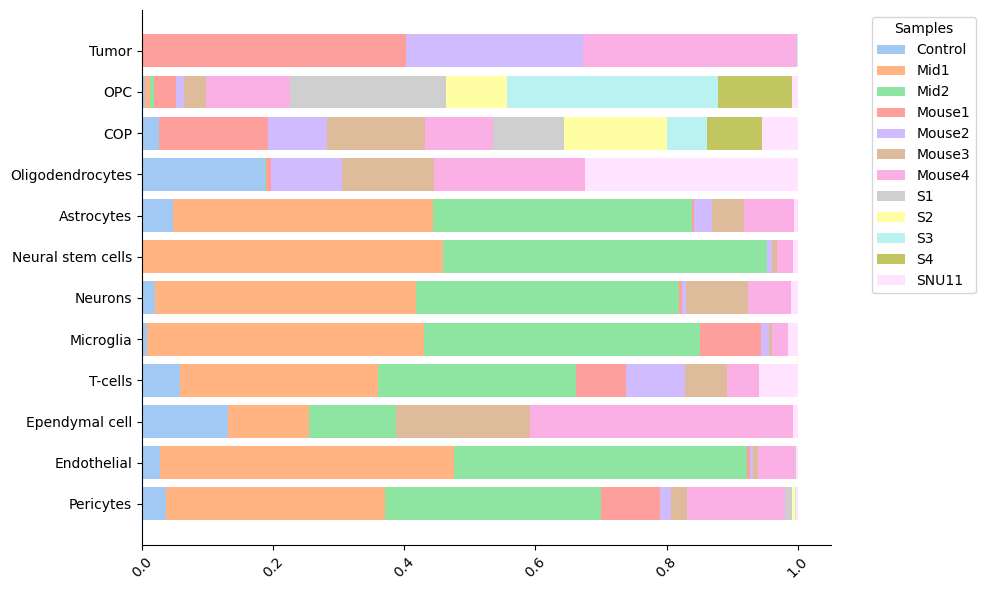

In [18]:
cell_counts = adata.obs.groupby(['cell_type', 'sample_info']).size().unstack(fill_value=0)
proportions = cell_counts.div(cell_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

bottom = None
for i, gfp in enumerate(proportions.columns):
    ax.barh(
        proportions.index,
        proportions[gfp],
        left=bottom,
        color=sample_color[i % len(sample_color)], 
        label=gfp,      
    )
    if bottom is None:
        bottom = proportions[gfp]
    else:
        bottom += proportions[gfp]

ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig(os.path.join(plot_path, 'Extended_Figure_13b_mouse_proportions.pdf'), dpi = 300, format = 'pdf', bbox_inches='tight')
plt.show()